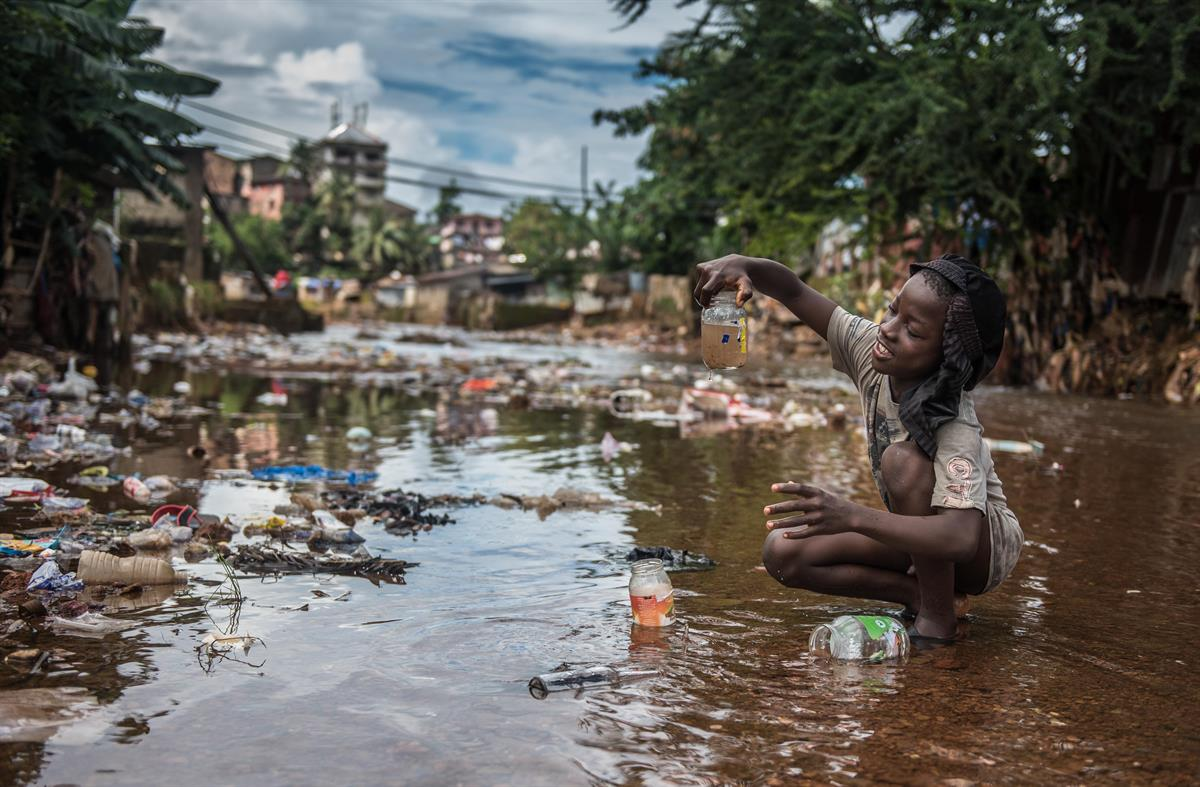


# Cholera has likely been affecting humans for many centuries. Reports of cholera-like disease have been found in India as early as 1000 AD. Cholera is a term derived from Greek khole (illness from bile) and later in the 14th century to colere (French) and choler (English). In the 17th century, cholera was a term used to describe a severe gastrointestinal disorder involving diarrhea and vomiting. 


# Cholera is an extremely virulent disease that can cause severe acute watery diarrhoea. It takes between 12 hours and 5 days for a person to show symptoms after ingesting contaminated food or water (2). Cholera affects both children and adults and can kill within hours if untreated.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# import visualize package
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the dataset
dataset = pd.read_csv("/kaggle/input/cholera-dataset/data.csv")

In [ ]:
# print first five
dataset.head()

In [ ]:
# dataset information
dataset.info()

In [ ]:
# dataset shape
dataset.shape

In [ ]:
# check the null value
dataset.isnull().sum()

In [ ]:
# Number of reported cases of cholera: 22, Number of reported deaths from cholera: 117, Cholera case fatality rate: 127 total null value

In [ ]:
# replace the missing value
# replace all missing values by 0
dataset.replace(np.nan, "0", regex=True, inplace=True)

In [ ]:
# so no-null value
dataset.info()

In [ ]:
# replace some unnecessary space, dot, word etc.
dataset["Number of reported cases of cholera"] = dataset["Number of reported cases of cholera"].str.replace(" ", "")
dataset["Number of reported deaths from cholera"] = dataset["Number of reported deaths from cholera"].str.replace("Unknown", "0")
dataset["Number of reported deaths from cholera"] = dataset["Number of reported deaths from cholera"].str.replace("0 0", "0")
dataset["Cholera case fatality rate"] = dataset["Cholera case fatality rate"].str.replace("0.0 0.0", "0")
dataset["Cholera case fatality rate"] = dataset["Cholera case fatality rate"].str.replace("Unknown", "0")

In [ ]:
#  function for convert object to int
def convert_int(pass_the_column_name, intORfloat):
    dataset[pass_the_column_name] = dataset[pass_the_column_name].astype(intORfloat)

In [ ]:
# For Number of reported cases of cholera
convert_int("Number of reported cases of cholera", int)
# For Year
convert_int("Year", int)
# For Number of reported deaths from cholera
convert_int("Number of reported deaths from cholera", int)
# For Fatality rate
convert_int("Cholera case fatality rate", float)

In [ ]:
# all countries from dataset
dataset["Country"].unique()

In [ ]:
# Descriptive Statistics
dataset.describe()

In [ ]:
# For different country, we see the repoted case, year by year
def countryVSreportedCase(country_name):
    country = dataset[dataset["Country"] == country_name][["Year", "Number of reported cases of cholera", "Cholera case fatality rate"]]
    sns.set_style("whitegrid")
    plt.subplots(figsize=(15,6))
    plt.plot(country["Year"], country["Number of reported cases of cholera"], linewidth=3)
    plt.xlabel("Year")
    plt.ylabel("Number of reported cases of cholera")
    plt.title(f"For {country_name}")

In [ ]:
# For Afgahanistan
countryVSreportedCase("Afghanistan")

We see that, after 1965, reported case gradually increasing, till 1993..
It again increase 1996-1998
and maximum at 2015

In [ ]:
# For Bangladesh
countryVSreportedCase("Bangladesh")
# We see that maximum case at 1950

In [ ]:
# For India
countryVSreportedCase("India")

In [ ]:
# For Sierra Leone
countryVSreportedCase("Sierra Leone")

In [ ]:
# WHO has six region
dataset["WHO Region"].unique()

In [ ]:
# seperate by WHO Region
EM = dataset[dataset["WHO Region"] == "Eastern Mediterranean"]
AF = dataset[dataset["WHO Region"] == "Africa"]
EU = dataset[dataset["WHO Region"] == "Europe"]
AM = dataset[dataset["WHO Region"] == "Americas"]
WP = dataset[dataset["WHO Region"] == "Western Pacific"]
SEA = dataset[dataset["WHO Region"] == "South-East Asia"]

In [ ]:
# Visualize by WHO Region

def compareRegionally(*argv):
    country1 = argv[0]
    country2 = argv[1]
    country3 = argv[2]
    country4 = argv[3]
    country5 = argv[4]
    country6 = argv[5]
    
    f, ax = plt.subplots(figsize=(15,6))
    labels = argv
    # Eastern Mediterranean
    country_1 = EM.loc[(EM["Country"]==country1)]
    plt.plot(country_1["Year"], country_1["Number of reported cases of cholera"], linewidth=3)
    # Africa
    country_2 = AF.loc[(AF["Country"]==country2)]
    plt.plot(country_2["Year"], country_2["Number of reported cases of cholera"], linewidth=3)
    # Europe
    country_3 = EU.loc[(EU["Country"]==country3)]
    plt.plot(country_3["Year"], country_3["Number of reported cases of cholera"], linewidth=3)
    # America
    country_4 = AM.loc[(AM["Country"]==country4)]
    plt.plot(country_4["Year"], country_4["Number of reported cases of cholera"], linewidth=3)
    # Western Pacific
    country_5 = WP.loc[(WP["Country"]==country5)]
    plt.plot(country_5["Year"], country_5["Number of reported cases of cholera"], linewidth=3)
    # South East Asia
    country_6 = SEA.loc[(SEA["Country"]==country6)]
    plt.plot(country_6["Year"], country_6["Number of reported cases of cholera"], linewidth=3)
    # plot by matplotlib
    plt.xlabel("Year")
    plt.ylabel("Number of reported cases of cholera")
    plt.legend(labels)
    # add title
    plt.title(f"Number of cases in :{labels[0]} vs {labels[1]} vs {labels[2]} vs {labels[3]} vs {labels[4]} vs {labels[5]}")

In [ ]:
# compare by WHO REGION: Eastern Mediterranean, Africa, Europe, America, Western Pacific, South East Asia's different country
compareRegionally("Afghanistan", "Zimbabwe", "France", "Brazil", "Australia", "Bangladesh")
compareRegionally("Bahrain", "Angola", "United Kingdom of Great Britain and Northern Ireland", "United States of America", "Viet Nam", "India")
compareRegionally("Somalia", "Zambia", "Belgium", "Canada", "Cambodia", "Sri Lanka")

In [ ]:
# create a new dataframe for reported deaths from cholera
death = dataset.groupby(["Country", "WHO Region"])["Number of reported deaths from cholera"].sum().reset_index()
death = pd.DataFrame(death)

In [ ]:
# 1st five row
death.head()

In [ ]:
# total country
death["Country"].nunique()

In [ ]:
# WHO Regionally death
eastern_maditer = death.loc[(death["WHO Region"]=="Eastern Mediterranean")]
africa = death.loc[(death["WHO Region"]=="Africa")]
europe = death.loc[(death["WHO Region"]=="Europe")]
western = death.loc[(death["WHO Region"]=="Western Pacific")]
south_east_asia = death.loc[(death["WHO Region"]=="South-East Asia")]

def deathrate(region):
    global eastern_maditer, africa, europe, western, south_east_asia
    r = region["WHO Region"].unique()
    plt.subplots(figsize=(16,6))
    plt.xticks(rotation=90)
    sns.barplot(x=region["Country"], y=region["Number of reported deaths from cholera"], data=region)
    plt.title(f"WHO Region for: {r}")

In [ ]:
deathrate(eastern_maditer)
deathrate(africa)
deathrate(europe)
deathrate(western)
deathrate(south_east_asia)

# From the barplot, We see that Maximum reported death in India. It's around 509438

In [ ]:
# Fatality rate for top 30coutries
fatality = dataset.groupby(["Country", "Year"])["Cholera case fatality rate"].max().sort_values(ascending=False).reset_index()
fatality = pd.DataFrame(fatality).head(30)

In [ ]:
# top 30row
fatality.head(30)

In [ ]:
# visualize the fatality for top 30 coutry
plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
plt.ylabel("Cholera case fatality rate")
plt.xlabel("Country")
x = fatality["Country"]
y = fatality["Cholera case fatality rate"]
plt.bar(x, y)

## Italy at 1958, they report case only 2, but death recorded 9. So its showing high fatality rate

In [ ]:
dataset.head()

In [ ]:
deathRate = dataset.groupby('Country').sum().loc[:, ['Number of reported cases of cholera', 'Number of reported deaths from cholera']]

In [ ]:
deathRate['Death Rate(%)'] = deathRate['Number of reported deaths from cholera'] * 100 / deathRate['Number of reported cases of cholera']
deathRate = deathRate.sort_values('Death Rate(%)', ascending=False).head(30)

In [ ]:
sns.set_style("whitegrid")
plt.subplots(figsize=(15, 9))
sns.barplot(y=deathRate.index, x=deathRate["Death Rate(%)"])

## Death Rate is maximum in Bangladesh. It's around 47%. and the 3rd position is India

# Also noticeable that Europian Region hase less record of cases..

# Cholera is an infectious disease that causes severe watery diarrhea, which can lead to dehydration and even death if untreated. It is caused by eating food or drinking water contaminated with a bacterium called Vibrio cholerae.

# Most affected from South-East Asian ,Africa Regional and Latin America. Beacause, lack of safe drinking water and proper treatment..

# Cholera still exist in those region..

# Five Basic Stpes to Prevent Cholera
    
    1. Drink Safe Water
    2. Wash Hand with soap and safe water
    3. Proper latrin system
    4. Before cooking, wash them by safe water
    5. Wash yourself, your children, diapers, and clothes, 30 meters (98 feet) away from drinking water sources.